# ****Import Python Library

Following are the Packages Import 
(1) pandas # Pandas Library to load the CSV, TSV Files

(2) numpy # Numerical Operation on Data

(3) sklearn.model_selection # import the train_test_split which will split the data set into the Train & Test Dataset

(4) sklearn.metrics # Import the mean_squared_error (MSE) to evaluate the model and pairwise_distances to calculate the distance between the two vecors

(5) sklearn.metrics.pairwise # Import the cosine similarity

(6) scipy.spatial.distance # Import the Cosine and corelation between the vectors


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error,pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine, correlation
import warnings
warnings.filterwarnings('ignore')

# ***Load the Data.

I have copied the data into the Local Drive, before load into the variable via pandas

In [2]:
# Reading ratings file
ratings = pd.read_csv('../data/ratings.dat', sep='::', encoding='latin-1', names=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('../data/movies.dat', sep='::', encoding='latin-1', names=['movieId','title','genres'])

##### Size of the Rating Datasets Loaded (Printing)

In [3]:
print ("Size of the ratings dataset: {}".format(ratings.shape))
ratings.head(5)

Size of the ratings dataset: (1000209, 4)


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


##### Size of the Movies Datasets Loaded (Printing)

In [4]:
print ("Size of the movies dataset: {}".format(movies.shape))
movies.head(5)

Size of the movies dataset: (3883, 3)


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Merge the datasets of movies and rtatings dataframe

In [5]:
df_movies_ratings=pd.merge(movies, ratings,how="inner",on="movieId")
print ("Size of the movies dataset: {}".format(df_movies_ratings.shape))
df_movies_ratings.head(5)

Size of the movies dataset: (1000209, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


#  ***SYSTEM - I

## SCHEME - I (High Rated)

Propose the User Top 10 Movies (High Rated) against the input Genres 


The Top 10 High Rated Movies are based on the "Rating". So once the "genres" has been input, we will search for all the movies against the respective "genres". We will then calculate average all the rating (mentioned by all the users) against the movie id, then sort it. We will show the Top 10 Movies which have the highest average rating.

### Input the Genres (From the User)

In [6]:
input_genres = 'Comedy'

### Extract Movies and Average the Rating 

Extract all the Movies, UserIds, Ratings against the Input Genres

Then stored the Average the "Rating" against each movideId (& Title) 

In [7]:
df_movies_ratings_genres = df_movies_ratings[df_movies_ratings['genres'] == 'Comedy']
df_movies_ratings_genres_grouped_by_rating = df_movies_ratings_genres.groupby(['movieId','title']).mean().reset_index()
df_movies_ratings_genres_grouped_Top_10 = df_movies_ratings_genres_grouped_by_rating.sort_values(['rating'],ascending=False).head(10)
df_movies_ratings_genres_grouped_Top_10[['movieId','title','rating']]

,movieId,title,rating
204,1830,Follow the Bitch (1998),5.000000
384,3233,Smashing Time (1967),5.000000
354,3022,"General, The (1927)",4.368932
140,1136,Monty Python and the Holy Grail (1974),4.335210
348,2937,"Palm Beach Story, The (1942)",4.288462
122,905,It Happened One Night (1934),4.280749
81,598,Window to Paris (1994),4.250000
129,1002,Ed's Next Move (1996),4.250000
127,951,His Girl Friday (1940),4.249370
420,3462,Modern Times (1936),4.236066


### Show the Top 10 Movies (SYSTEM - I & SCHEME - I )

In [8]:
df_movies_ratings_genres_grouped_Top_10['title']

204                   Follow the Bitch (1998)
384                      Smashing Time (1967)
354                       General, The (1927)
140    Monty Python and the Holy Grail (1974)
348              Palm Beach Story, The (1942)
122              It Happened One Night (1934)
81                     Window to Paris (1994)
129                     Ed's Next Move (1996)
127                    His Girl Friday (1940)
420                       Modern Times (1936)
Name: title, dtype: object

## SCHEME - II (Trending)

Propose the User Top 10 Movies (Trending) against the input Genres 


The Top 10 Trending Movie is derived based on the number of users rated the movie. If large number of users have rated the movie, will treat the movie is a trending

### Input the Genres (From the User)

In [9]:
input_genres = 'Comedy'

### Extract Movies and Average the Rating 

Extract all the Movies, UserIds, Ratings against the Input Genres

Then stored the Average the "Rating" against each movideId (& Title) 

In [10]:
df_movies_ratings_genres = df_movies_ratings[df_movies_ratings['genres'] == 'Comedy']
df_movies_ratings_genres_grouped_by_User_Id_Count = df_movies_ratings_genres.groupby(['movieId','title']).sum().reset_index()
df_movies_ratings_genres_grouped_Top_10_user_Id_Count = df_movies_ratings_genres_grouped_by_User_Id_Count.sort_values(['userId'],ascending=False).head(10)
df_movies_ratings_genres_grouped_Top_10_user_Id_Count


,movieId,title,userId,rating,timestamp
350,2997,Being John Malkovich (1999),6812507,9245,2176167564950
140,1136,Monty Python and the Holy Grail (1974),4926716,6932,1554749970467
324,2791,Airplane! (1980),4834332,6874,1683064258937
345,2918,Ferris Bueller's Day Off (1986),4579092,6065,1431218141186
159,1394,Raising Arizona (1987),4466021,5766,1393007524779
305,2599,Election (1999),4386151,5982,1479535681520
308,2683,Austin Powers: The Spy Who Shagged Me (1999),4368093,4859,1394669169002
132,1079,"Fish Called Wanda, A (1988)",4201738,5266,1287726379158
29,223,Clerks (1994),4173569,5573,1372721807925
312,2706,American Pie (1999),4140443,5153,1351613377020


### Show the Top 10 Movies (SYSTEM - I & SCHEME - II )

In [11]:
df_movies_ratings_genres_grouped_Top_10_user_Id_Count['title']

350                     Being John Malkovich (1999)
140          Monty Python and the Holy Grail (1974)
324                                Airplane! (1980)
345                 Ferris Bueller's Day Off (1986)
159                          Raising Arizona (1987)
305                                 Election (1999)
308    Austin Powers: The Spy Who Shagged Me (1999)
132                     Fish Called Wanda, A (1988)
29                                    Clerks (1994)
312                             American Pie (1999)
Name: title, dtype: object

##### Create the X & y to used it further in SYSTEM - II

In [12]:
X = ratings.copy()
y = ratings['userId']

##### Defining the Function Rot Mean Squared Error (RMSE)

In [13]:
#Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:
#Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    id_pairs = zip(X_test['userId'], X_test['movieId']) #Construct a list of user-movie tuples from the testing dataset
    y_pred = np.array([cf_model(user, movie) for (user, movie) in id_pairs]) #Predict the rating for every user-movie tuple
    y_true = np.array(X_test['rating']) #Extract the actual ratings given by the users in the test data
    return rmse(y_true, y_pred) #Return the final RMSE score

#  SYSTEM - II

# Collaborative Filtering
Types of collaborative filtering techniques
* Memory based 
 - User-Item Filtering
 - Item-Item Filtering
* Model based 
 - Matrix Factorization
 - Clustering
 - Deep Learning
 ![alt text](https://cdn-images-1.medium.com/max/1500/1*7uW5hLXztSu_FOmZOWpB6g.png)

## Memory Based Approach
 ![alt text](https://cdn-images-1.medium.com/max/1500/1*QvhetbRjCr1vryTch_2HZQ.jpeg)

In either scenario, we builds a similarity matrix. For user-user collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:

- **Jaccard Similarity**
- **Cosine Similarity** 
- **Pearson Similarity** 

## User-Item  Filtering


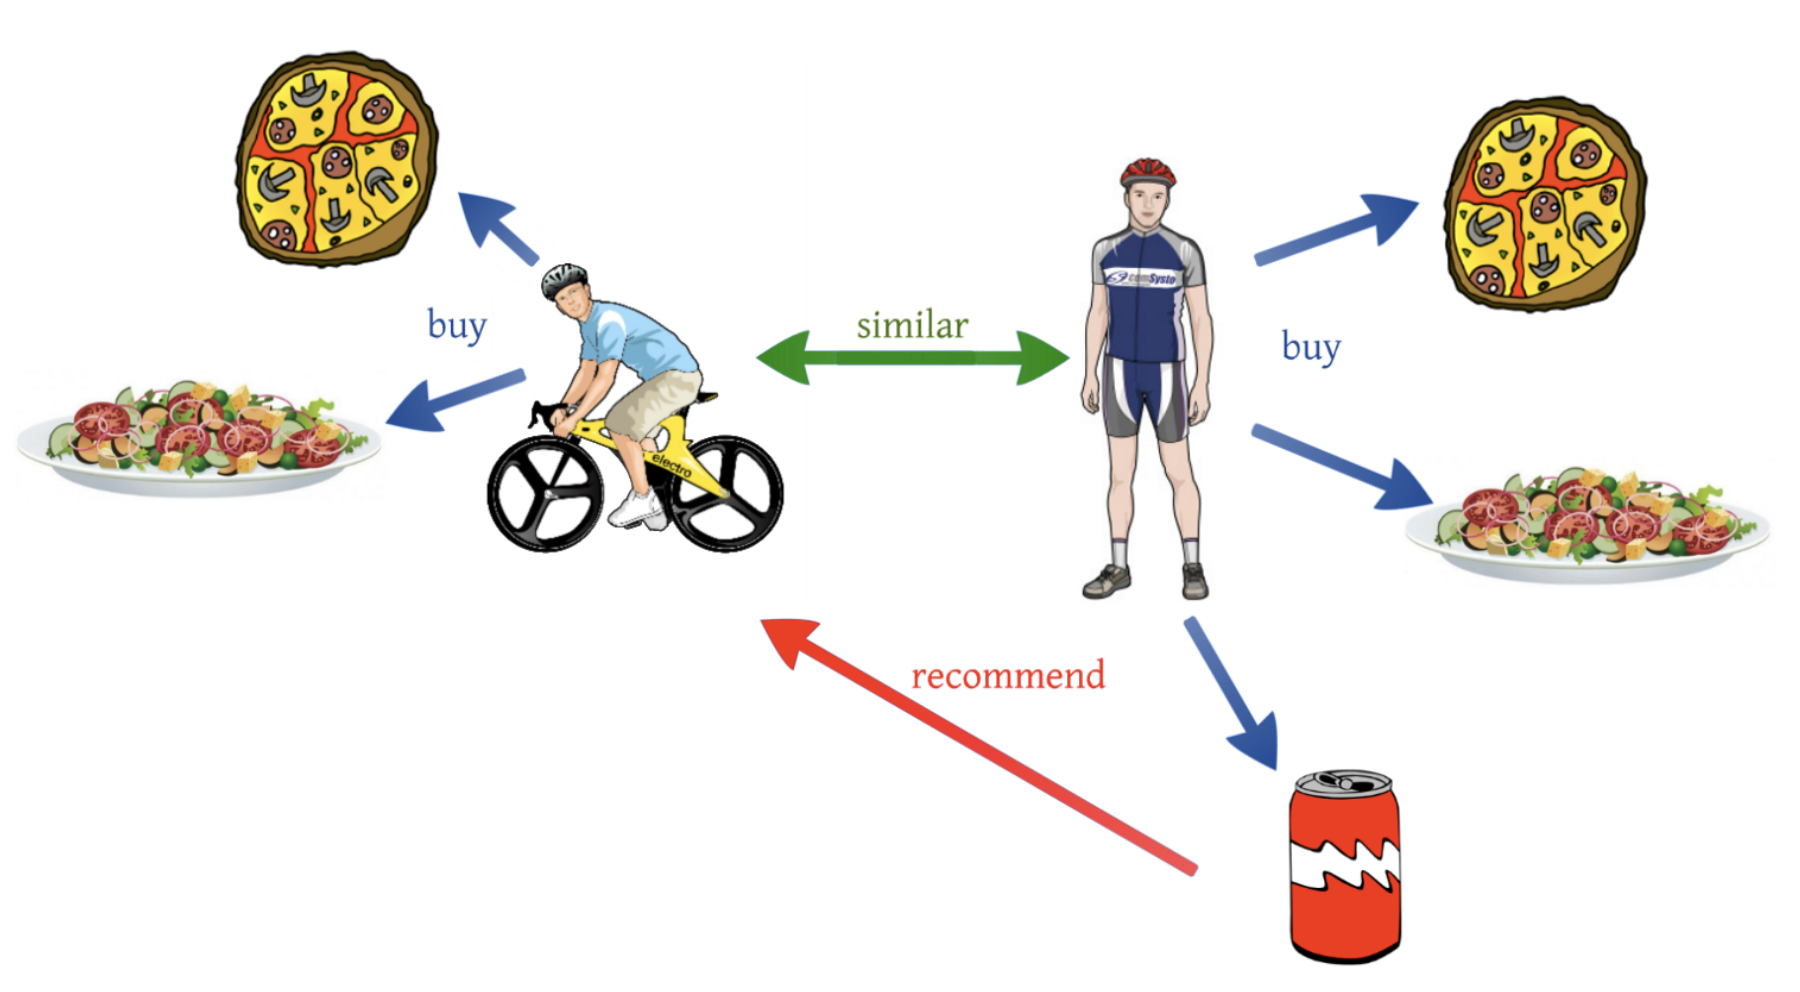


User-Item collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.


### **Mean (User)

As part of this, we will take the userId and movieId and output the mean rating for the movie by all the users who have rated it



In [50]:
#User Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, movie_id):
    if movie_id in r_matrix:  #Check if movie_id exists in r_matrix
        mean_rating = r_matrix[movie_id].mean() #Compute the mean of all the ratings given to the movie
    else:
        mean_rating = 3.0 #Default to a rating of 3.0 in the absence of any information
    return mean_rating

### **Train Matrix (Index = userId)

Convert the Train Data into the Matrix (Pivot Table) where index = "userID" and columns will be based on "movieId" index


In [51]:
def train_matrix_userId(X_train_input):
    r_matrix_userId_output = X_train_input.pivot_table(values='rating', index='userId', columns='movieId')
    r_matrix_userId_output = r_matrix_userId_output.fillna(0)
    return r_matrix_userId_output

### **Consine Similarity Matrix

Create the Consine Similarity Matrix based on the r_matrix

In [54]:
def cosine_similarity_matrix(r_matrix_input):
    #Compute the cosine similarity matrix using the dummy ratings matrix
    cosine_sim_output = cosine_similarity(r_matrix_input, r_matrix_input)
    
    #Convert into pandas dataframe 
    cosine_sim_output = pd.DataFrame(cosine_sim_output, index=r_matrix_input.index, columns=r_matrix_input.index)
    
    return cosine_sim_output

### #User Based Collaborative Filter using Mean Ratings

##### K Fold (Fold = 10)

In [46]:
kf = KFold(n_splits=10)
fold_ = 1 
for (train_idx,test_idx) in kf.split(X):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    
    r_matrix_userId = train_matrix_userId(X.iloc[train_idx])
    cosine_sim_userId = cosine_similarity_matrix(r_matrix_userId)
    score_fold_userId = score(cf_user_mean)
    print ("Fold ...: {}  Score: {}".format(fold_,score_fold_userId))
    fold_ = fold_ + 1

Fold ...: 1  Score: 3.262925515882674
Fold ...: 2  Score: 3.208014523534114
Fold ...: 3  Score: 3.256248203130848
Fold ...: 4  Score: 3.2346759939414427
Fold ...: 5  Score: 3.2669472549940197
Fold ...: 6  Score: 3.240575673683529
Fold ...: 7  Score: 3.233239722704772
Fold ...: 8  Score: 3.269772940152387
Fold ...: 9  Score: 3.2904828133848514
Fold ...: 10  Score: 3.2697479686408477


## Item-Item  Filtering

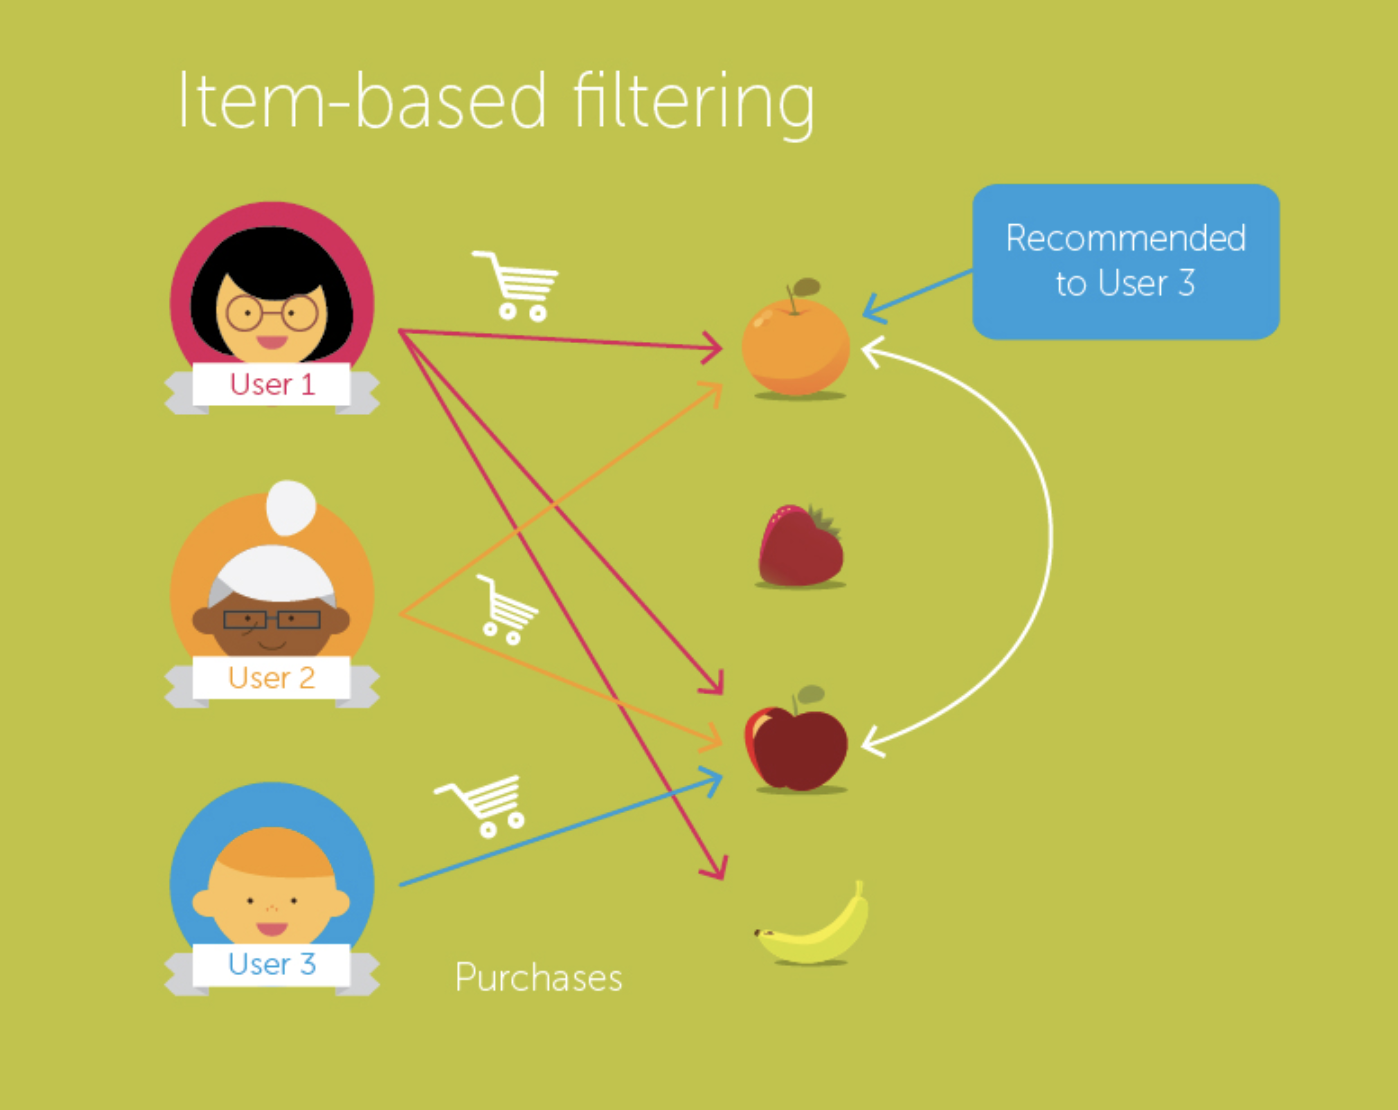

ITEM-ITEM collaborative filtering look for items that are similar to the articles that user has already rated and recommend most similar articles. But what does that mean when we say item-item similarity? In this case we don’t mean whether two items are the same by attribute like Fountain pen and pilot pen are similar because both are pen. Instead, what similarity means is how people treat two items the same in terms of like and dislike.

It is quite similar to previous algorithm, but instead of finding user’s look-alike, we try finding movie’s look-alike. Once we have movie’s look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

### **Mean (Item)

As part of this, we will take the userId and movieId and output the mean rating for the movie by all the users who have rated it



In [49]:
#User Based Collaborative Filter using Mean Ratings
def cf_item_mean(movie_id, user_id):
    if user_id in r_matrix:  #Check if movie_id exists in r_matrix
        mean_rating = r_matrix[user_id].mean() #Compute the mean of all the ratings given to the movie
    else:
        mean_rating = 3.0 #Default to a rating of 3.0 in the absence of any information
    return mean_rating

### **Train Matrix (Index = "movieId")

Convert the Train Data into the Matrix (Pivot Table) where index = "userID" and columns will be based on "movieId" index



In [52]:
def train_matrix_movieId(X_train_input):
    r_matrix_movieId_output = X_train_input.pivot_table(values='rating', index='movieId', columns='userId')
    r_matrix_movieId_output = r_matrix_movieId_output.fillna(0)
    return r_matrix_movieId_output

### **Consine Similarity Matrix

Create the Consine Similarity Matrix based on the r_matrix

In [53]:
def cosine_similarity_matrix(r_matrix_input):
    #Compute the cosine similarity matrix using the dummy ratings matrix
    cosine_sim_output = cosine_similarity(r_matrix_input, r_matrix_input)
    
    #Convert into pandas dataframe 
    cosine_sim_output = pd.DataFrame(cosine_sim_output, index=r_matrix_input.index, columns=r_matrix_input.index)
    
    return cosine_sim_output

### #User Based Collaborative Filter using Mean Ratings

In [ ]:
kf = KFold(n_splits=10)
fold_ = 1 
for (train_idx,test_idx) in kf.split(X):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    
    r_matrix_movieId = train_matrix_movieId(X.iloc[train_idx])
    cosine_sim_movieId = cosine_similarity_matrix(r_matrix_movieId)
    score_fold_movieId = score(cf_item_mean)
    print ("Fold ...: {}  Score: {}".format(fold_,score_fold_movieId))
    fold_ = fold_ + 1